<a href="https://colab.research.google.com/github/KacperKaszuba0608/ML_projects/blob/main/predicting_heart_diseases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center> <h1> Guided Project: Predicting Heart Disease </h1> <center>

## Introduction

Every year approximately 17.9 million people die from cardiovascular diseases (CVDs) - World Health Organization (WHO). R&D company collected anonymized data from many hospitals which includes relevant information for each patient (personal and medical data). The dataset has the following features:

1. `Age` \[years\]
2. `Sex` \[M: Male, F: Female\]
3. `ChestPainType` \[TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic\]
4. `RestingBP` - resting blood pressure \[mm Hg\]
5. `Cholesterol` \[mm/dl\]
6. `FastingBS` - fasting blood sugar \[1: if FastingBS > 120 mg/dl, 0: otherwise\]
7. `RestingECG` - resting electrocardiogram results \[Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria\]
8. `MaxHR` - maximym heart rate \[Numeric value between 60 and 202\]
9. `ExerciseAngina` - exercise-induced angina \[Y: Yes, N: No\]
10. `Oldpeak` - \[Numeric value measured in depression\]
11. `St_Slope` - the slope of the peak exercise ST segment \[Up: upsloping, Flat: flat, Down: downsloping\]
12. `HeartDisease` \[1: heart disease, 0: Normal\]

**My goal of this project is to build a Machine Learning Model to predicting heart disease.**

## Importing labraries and reading in dataset

In [ ]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Reading in data

hd = pd.read_csv('heart_disease_prediction.csv')
hd.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
hd.dtypes.value_counts()

int64      6
object     5
float64    1
dtype: int64

As we see above, dataset contains `7` numeric features and `5` categorical features but `FatingBS` and `HeartDisease` columns are categorical too. Let's see which one is which type.

In [ ]:
hd.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

## Descriptive Statistics

In [ ]:
hd.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


I can say dataset doesn't contain any missing valueEvery column has 918 rows. The average of patients age is between `53` and `54` year old. The youngest patient is `28` year old and the oldest is `77` year old. If we focus on Cholestorl column, we can see that records has very high standard error. This means that the scores are very spread out around the average. Following this conclusion we can say that the maximum value for cholesterol doesn't look right and the column may contain many outliers. From the other hand the minimum value is `0` and it can't be right too.

Another strange values contains RestingBP column. As we see the lowest BP is `0` (patient should be dead whith blood presure like this) and the highest is `200` (can't be possible when patient is resting).

I will clean this data later. Now let's check for missing data in the columns.

In [ ]:
hd.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

As we can see there are no missing values.

## Visualizations

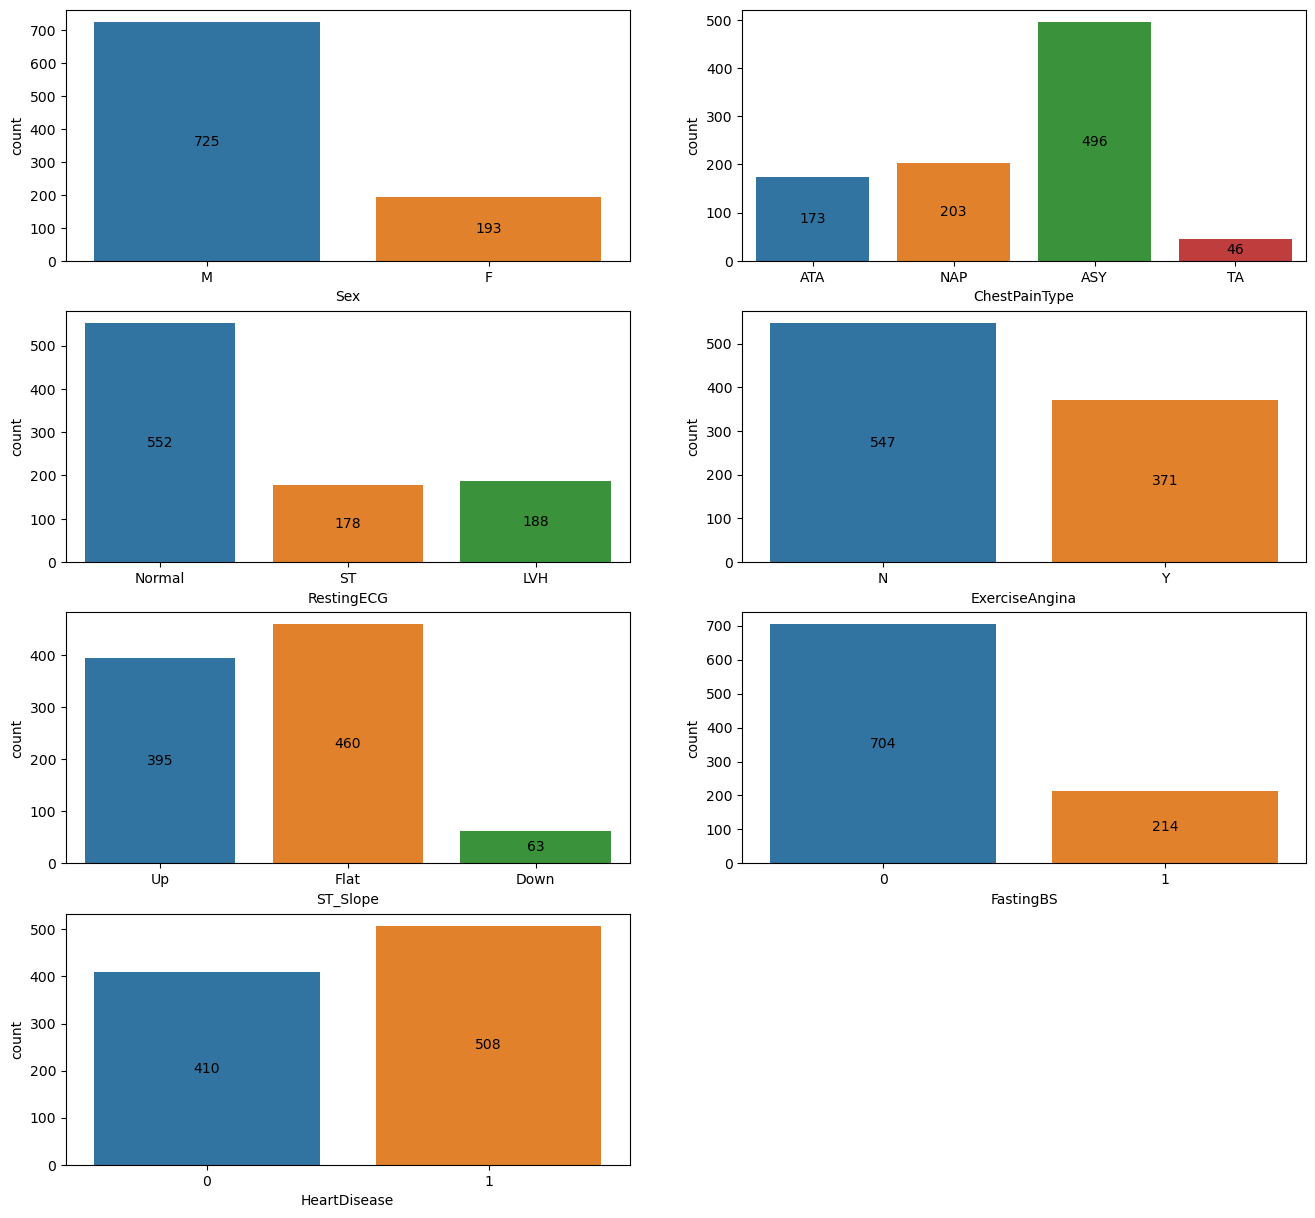

In [ ]:
# categorical features list
cat_f = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'FastingBS', 'HeartDisease']

fig = plt.figure(figsize = (16,15))

# plotting the countplot
for idx, cat in enumerate(cat_f):
    plot = plt.subplot(4,2, idx+1)
    sns.countplot(x=hd[cat], ax=plot)
    # adding the label to plots
    for container in plot.containers:
        plot.bar_label(container, label_type="center")

After analyse plots above I can say, that:
* most male patients in the dataset
* most ASY type of chest pain
* most patients have normal resting electrocardiogram results
* most patients don't have exercise-induced angina
* most patients have upsloping or flat peak exercise ST segment
* most patients have asting blood sugar $\leq$ 120 mg/dl
* the number of cases is comparable

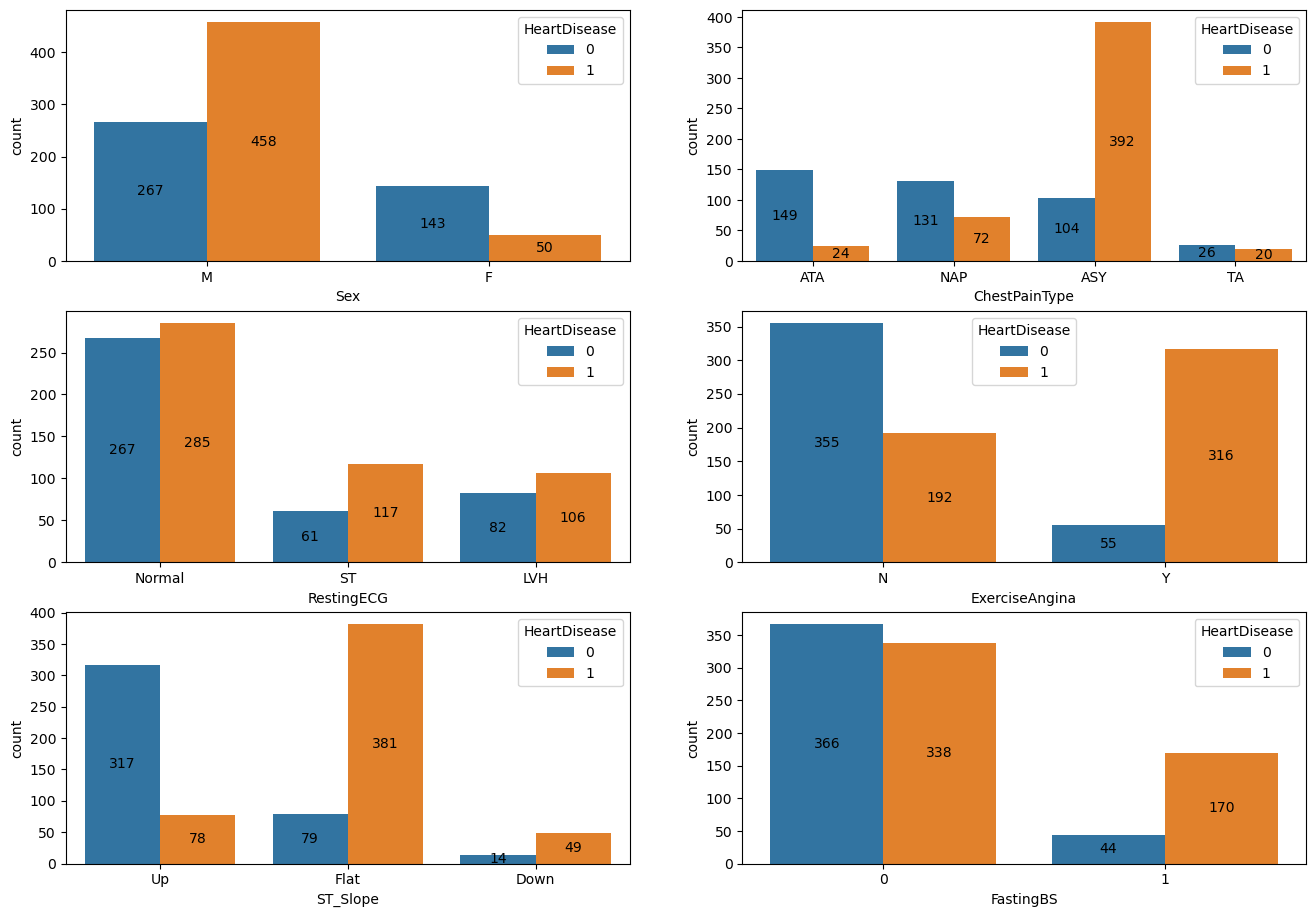

In [ ]:
# categorical features list
cat_f = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'FastingBS']

fig = plt.figure(figsize = (16,15))

# plotting the countplot
for idx, cat in enumerate(cat_f):
    plot = plt.subplot(4,2, idx+1)
    sns.countplot(x=hd[cat], hue=hd['HeartDisease'], ax=plot)
    # adding the label to plots
    for container in plot.containers:
        plot.bar_label(container, label_type="center")

Above bar plots represents the same categorical features grouped by determination of heart disease. I can clearly say, that:
* most male patients have heart disease (`458` male vs `50` female)
* most male patients with ASY type of chest pain have heart disease (`392`)
* every type of resting electrocardiogram results may provide to heart diseases
* exercise-induced angina, flat peak exercise ST segment and fasting blood sugar increases morbidity

After data anlysis we can select some relevant features to our machine learning model but at first let's do some data cleaning.

## Data Cleaning

In [ ]:
hd_clean = hd.copy()
# calculating the number of 0 value in RestingBP column
sum(hd_clean['RestingBP'] == 0)

1

In [ ]:
hd_clean[hd_clean['RestingBP'] == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1


We have only `one` row which have a `0` value for `RestingBP`, so we can remove it from out dataset.

In [ ]:
# removing row with 0
hd_clean = hd_clean.drop(hd_clean[hd_clean['RestingBP'] == 0].index, axis = 0)

In [ ]:
# calculating the number of 0 value in Cholesterol column
sum(hd_clean['Cholesterol'] == 0)

171

In [ ]:
hd_clean[hd_clean['Cholesterol'] == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
293,65,M,ASY,115,0,0,Normal,93,Y,0.0,Flat,1
294,32,M,TA,95,0,1,Normal,127,N,0.7,Up,1
295,61,M,ASY,105,0,1,Normal,110,Y,1.5,Up,1
296,50,M,ASY,145,0,1,Normal,139,Y,0.7,Flat,1
297,57,M,ASY,110,0,1,ST,131,Y,1.4,Up,1
...,...,...,...,...,...,...,...,...,...,...,...,...
514,43,M,ASY,122,0,0,Normal,120,N,0.5,Up,1
515,63,M,NAP,130,0,1,ST,160,N,3.0,Flat,0
518,48,M,NAP,102,0,1,ST,110,Y,1.0,Down,1
535,56,M,ASY,130,0,0,LVH,122,Y,1.0,Flat,1


We have a lot of rows with `0` value for `Cholesterol` column, so the best option will be replace those values with the median of the corresponding column and the corresponding `HeartDisease (HD)` value.

In [ ]:
# median with HD = 1
med1 = hd_clean.loc[hd_clean['HeartDisease'] == 1, 'Cholesterol'].median()

# median with HD = 0
med2 = hd_clean.loc[hd_clean['HeartDisease'] == 0, 'Cholesterol'].median()

# replace values with medians
hd_clean['Cholesterol'] = hd_clean.apply(lambda x: med1 if (x['HeartDisease']==1) and (x['Cholesterol']==0)
                                         else med2 if (x['HeartDisease']==0) and (x['Cholesterol']==0)
                                         else x['Cholesterol'], axis = 1)

In [ ]:
sum(hd_clean['Cholesterol'] == 0)

0

In [ ]:
hd_clean[['Cholesterol', 'RestingBP']].describe()

,Cholesterol,RestingBP
count,917.000000,917.000000
mean,239.700109,132.540894
std,54.352727,17.999749
min,85.000000,80.000000
25%,214.000000,120.000000
50%,225.000000,130.000000
75%,267.000000,140.000000
max,603.000000,200.000000


As we see above columns don't contain 0 values and statistics look good.

## Feature Selection

Thanks to a general understanding of the features, I can identify some of the features:
* `Age`
* `Sex`
* `ChestPainType`
* `Cholesterol`
* `FastingBS`
* `ST_Slope`
* `ExerciseAngina`

Right now I have to convert categorical columns into dummies variables.

In [ ]:
hd_clean = pd.get_dummies(data = hd_clean,
                          columns=['Sex','ChestPainType','ST_Slope',
                                   'ExerciseAngina','RestingECG'],
                          drop_first=True)

<AxesSubplot:>

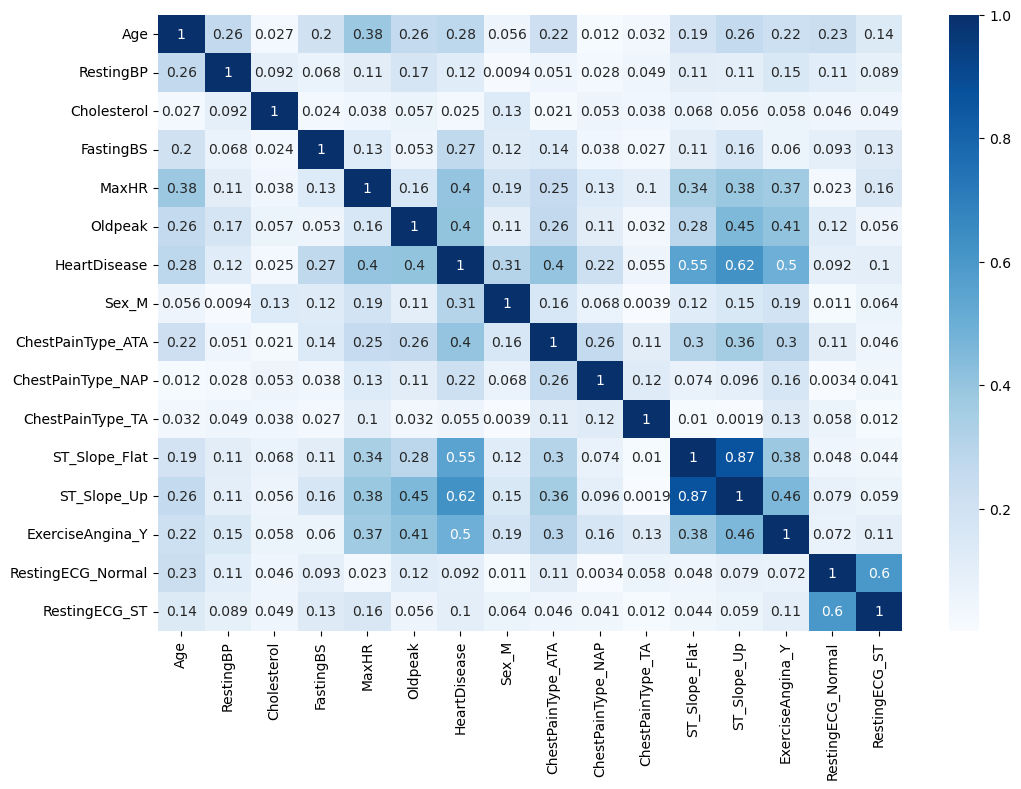

In [ ]:
correlations = abs(hd_clean.corr())
plt.figure(figsize=(12,8))
sns.heatmap(correlations, annot=True, cmap="Blues")

The heatmap above confirms most of my suspicions about the features and also points to the addition of `MaxHR` and `Oldpeak`. Maybe it's not a strong correlation, but it's enough to build a model.

What is suprise `Cholesterol` is not strongly correlated to `HeartDisease`.

I decided to choose faetures with correlation coefficient greater than 0.25.

In [ ]:
correlations[correlations['HeartDisease'] > 0.25]['HeartDisease']

Age                  0.282012
FastingBS            0.267994
MaxHR                0.401410
Oldpeak              0.403638
HeartDisease         1.000000
Sex_M                0.305118
ChestPainType_ATA    0.401680
ST_Slope_Flat        0.553700
ST_Slope_Up          0.621843
ExerciseAngina_Y     0.495490
Name: HeartDisease, dtype: float64

## Building a Classifier I

In [ ]:
X = hd_clean.drop('HeartDisease', axis = 1)
y = hd_clean['HeartDisease']

# spliting the dataset into training and validation sets.
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state=123)

# list of choosen features with k=3
features = ['Age', 'Sex_M', 'ChestPainType_ATA', 'FastingBS',
            'MaxHR', 'Oldpeak', 'ST_Slope_Flat', 'ST_Slope_Up',
            'ExerciseAngina_Y']

# building a model for each feature
for f in features:
    model = KNeighborsClassifier(n_neighbors=3)
    model.fit(X_train[[f]], y_train)
    accuracy = round(model.score(X_val[[f]], y_val),4)
    print(f'model with {f}: {accuracy}')

model with Age: 0.4891
model with Sex_M: 0.587
model with ChestPainType_ATA: 0.6685
model with FastingBS: 0.5
model with MaxHR: 0.5815
model with Oldpeak: 0.6685
model with ST_Slope_Flat: 0.788
model with ST_Slope_Up: 0.8043
model with ExerciseAngina_Y: 0.7228


The best perfomence has model with `ST_Slope_UP` (accuracy `0.8043`) and `ST_Slope_Flat` being a close second (`0.788`).

`Age` and `FastingBS` have the worst result so I decide to remove this features from model.

## Building a Classifier II

Before I build the model, it's important to normalized our features. I will do this with `MinMaxScaler` function.

In [ ]:
features = ['Sex_M', 'ChestPainType_ATA','MaxHR',
            'Oldpeak', 'ST_Slope_Flat', 'ST_Slope_Up',
            'ExerciseAngina_Y']

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train[features])
X_val_scaled = scaler.transform(X_val[features])

In [ ]:
# building a model
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train_scaled, y_train)
accuracy = model.score(X_val_scaled, y_val)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8043478260869565


Our model accuracy is the same as for model with only ST_Slope_Up, so it's not a bad, but it's a good start. Let's change some hyperparameters.

## Hyperparameter Tuning

Now that I have well-performing model, I can use A `GridSearchCV` function to experiment with some hyperparameters.
I choose to experiment with the following:
* n_neigbors,
* weights,
* metric,
* power.

Let's prepare my data first.

In [ ]:
X = hd_clean.drop('HeartDisease', axis = 1)
y = hd_clean['HeartDisease']

# spliting the dataset into training and validation sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=123)

features = ['Sex_M', 'ChestPainType_ATA','MaxHR',
            'Oldpeak', 'ST_Slope_Flat', 'ST_Slope_Up',
            'ExerciseAngina_Y']

# scaling the train dataset
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train[features])

Now, let's build a machine learning model.

In [ ]:
# dict with choosen parameters
hyperparameters = {'n_neighbors':range(1,20),
                   'weights':['uniform', 'distance'],
                   'metric':['minkowski', 'manhattan'],
                   'p':range(2,10)}

# building a model
model = KNeighborsClassifier()
clf = GridSearchCV(estimator=model, param_grid=hyperparameters, scoring='accuracy')
clf.fit(X_train_scaled, y_train)

print(f'Best score: {clf.best_score_}', f'Best params: {clf.best_params_}', sep = '\n')

Best score: 0.8512720156555774
Best params: {'metric': 'minkowski', 'n_neighbors': 17, 'p': 2, 'weights': 'uniform'}


As we see the best model has approximately `~85%` with params:
* metric : minkowski,
* n_neighbours: 17,
* power: 2,
* weights: uniform.

This is a strong improvement on the model trained before.

## Model Evaluation on Test Set

In [ ]:
# scaling the test dataset
X_test_scaled = scaler.transform(X_test[features])

# predicting on test dataset
pred = clf.best_estimator_.predict(X_test_scaled)

# calculating the accuracy of model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, pred)
print(f'Accuracy of model: {accuracy}')

Accuracy of model: 0.8152173913043478


Performance of my model slightly decrease. Why? Let's check the data.

In [ ]:
# numbers of sex
hd['Sex'].value_counts()

M    725
F    193
Name: Sex, dtype: int64

In [ ]:
# numbers of sex in train dataset
X_train['Sex_M'].value_counts()

1    574
0    159
Name: Sex_M, dtype: int64

In [ ]:
# numbers of sex in test dataset
X_test['Sex_M'].value_counts()

1    150
0     34
Name: Sex_M, dtype: int64

Distribution of sex in all datasets are the same. Most of patiens are male. Because of that our model accuracy is lower. This inbalance has negative impact on predicting.

## Summary and Next Steps

My final model has following parameters:
* metric : minkowski,
* n_neighbours: 17,
* power: 2,
* weights: uniform.

and had an accuracy `~82%` on test set. Unfortunantely I had imbalance dataset and that's why accuracy decreased by `2%`.

There are quite a few things we could try next to get better results:
* Try out different features.
* Expand the grid search parameters to identify more optimal hyperparameters.
* Explore other algorithms that might perform better than k-NN.
* Try and collect more data.